In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import lightgbm as lgb

In [2]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection, preprocessing, metrics
import matplotlib.pyplot as plt

In [2]:
# df_raw2= pd.read_csv('df_raw2_final.csv')

In [3]:
# df_raw2.shape

(3563, 673)

In [4]:
# df_raw2.index.values

array([   0,    1,    2, ..., 3560, 3561, 3562], dtype=int64)

In [5]:
# TESTinds = np.random.choice(df_raw2.index.values, 360, replace = False) #randomly choose 360 data points and reserve as test

In [6]:
# inds = np.setdiff1d(df_raw2.index.values, TESTinds)

In [18]:
# df_raw2_train=df_raw2.loc[inds]
# #df_raw2.drop(columns=['id'], inplace=True)
# df=df_raw2_train


# #df_raw2_train.to_csv("df_raw2_train.csv", index=False)
# df.shape

(3203, 673)

In [3]:
df_raw2_train= pd.read_csv('df_raw2_train.csv') #import train and validation dataset of 3203 data points
df_raw2_train.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,1.0,538.0,302.0,169.0,563.0,1000.0,1591.0,40000.0,309404152.0,686.0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,1395.0,602.0,148.0,0.0,161.0,1794.0,11000.0,200074175.0,258.0,...,0,0,0,0,0,1,0,0,0,0
2,3.0,251.0,813.0,164.0,22000.0,23000.0,381.0,27000.0,448130642.0,1339.0,...,0,0,0,0,0,1,0,0,0,0
3,5.0,62.0,462.0,132.0,475.0,530.0,1836.0,640.0,73058679.0,323.0,...,0,0,0,0,0,1,0,0,0,0
4,6.0,1398.0,392.0,156.0,0.0,4000.0,880.0,24000.0,336530303.0,554.0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df=df_raw2_train


In [5]:
cat_feats = ['actor_1_name','actor_2_name','actor_3_name','director_name']
#label encoded features as categorical features

# cat_feats2 = ['actor_1_name','actor_2_name','actor_3_name','director_name','title_year']


In [6]:
useless_cols = ["id","imdb_score"]

train_cols = df.columns[~df.columns.isin(useless_cols)]
X_train = df[train_cols]
y_train = df["imdb_score"]

In [7]:
df_raw2_test=pd.read_csv('df_raw2_test.csv')
# df_raw2_test= df_raw2.loc[TESTinds]
# df_raw2_test.shape
#df_raw2_test.to_csv("df_raw2_test.csv", index=False)
#df_raw2_test.shape

X_test=df_raw2_test[train_cols]
y_test=df_raw2_test["imdb_score"]
#preds = m_lgb.predict(X_test)

(360, 673)

In [7]:
fake_valid_inds = np.random.choice(X_train.index.values, 600, replace = False)

#fake_valid_inds = X_train.index.values[-698948:]
train_inds = np.setdiff1d(X_train.index.values, fake_valid_inds)
train_data = lgb.Dataset(X_train.loc[train_inds] , label = y_train.loc[train_inds], 
                         categorical_feature=cat_feats, free_raw_data=False)
fake_valid_data = lgb.Dataset(X_train.loc[fake_valid_inds], label = y_train.loc[fake_valid_inds],
                              categorical_feature=cat_feats,
                 free_raw_data=False)

In [14]:


params = {
        'min_child_weight': [1,2, 5],
        'gamma': [0.5, 1, 2],
        'subsample': [ 0.8,0.6],
        'colsample_bytree': [0.9,0.6],
        'max_depth': [2,3,4, 5,8,9,10,11,12,15],
        #'eta':[0.039,0.1, 0.5],
        'learning_rate':[0.039,0.1, 0.5],# [0.05],
        'objective':['tweedie'],
        'eval_metric':['rmse']
    
        }

In [11]:
# params = {
#         "objective" : 'poisson',  
#         "metric" :"rmse",
#         "force_row_wise" : True,
#         "learning_rate" : 0.075,# 0.05, #
# #         "sub_feature" : 0.8,
#         "sub_row" : 0.75,
#         "bagging_freq" : 1,
#         "lambda_l2" : 0.1,
# #         "nthread" : 4
#         #'max_depth': 10,
#         "metric": ["rmse"],
#     'verbosity': 1,
#     'num_iterations' : 1200*2,
#     'num_leaves': 128,
#     "min_data_in_leaf": 100,
# }

In [15]:
lgb_algo = lgb.LGBMRegressor()
grid = RandomizedSearchCV(lgb_algo,params,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           sile...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.9, 0.6],
     

In [17]:
#best parameters
grid.best_params_

# {'subsample': 0.8,
#  'objective': 'tweedie',
#  'min_child_weight': 1,
#  'max_depth': 9,
#  'learning_rate': 0.1,
#  'gamma': 2,
#  'eval_metric': 'rmse',
#  'colsample_bytree': 0.9}

{'subsample': 0.8,
 'objective': 'tweedie',
 'min_child_weight': 1,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 2,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.9}

In [18]:
preds = grid.predict(X_test)

In [16]:
# %%time

# m_lgb = lgb.train(params, train_data, valid_sets = [fake_valid_data], verbose_eval=20) 

In [19]:
# m_lgb.save_model("modelLGB.lgb")
import sklearn.metrics as metrics
import math
print('LightGBM - test rmse: ', math.sqrt(metrics.mean_squared_error(y_test, preds)))
#base.7757107405777778
#after parameters tune 1
#LightGBM - test rmse:  0.7364541841856148

LightGBM - test rmse:  0.7364541841856148


Text(0, 0.5, 'Feature Importance Score')

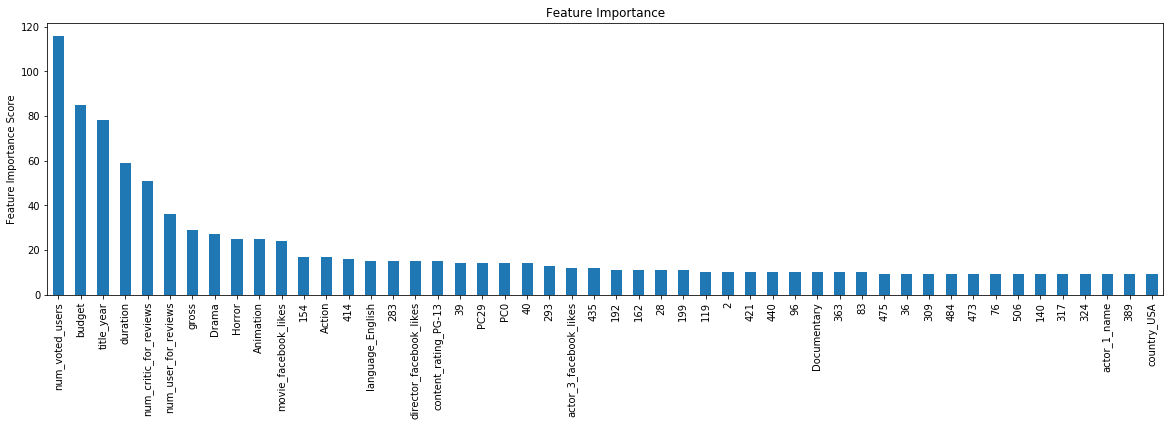

In [20]:
#Feature importance for top 50 predictors
predictors = [x for x in X_train.columns]
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

In [8]:
params = {
        'min_child_weight': [1,2, 5],
        'gamma': [0.5, 1, 2],
        'subsample': [ 0.8,0.6],
        'colsample_bytree': [0.9,0.6],
        'max_depth': [2,3,4, 5,8,9,10,11,12,15],
        #'eta':[0.039,0.1, 0.5],
        'learning_rate':[0.039,0.1, 0.5],# [0.05],
        'objective':['poisson'],
        'eval_metric':['rmse']
    
        }

lgb_algo = lgb.LGBMRegressor()
grid2 = RandomizedSearchCV(lgb_algo,params,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid2.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           sile...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.9, 0.6],
     

In [24]:
#best parameters
grid2.best_params_

# {'subsample': 0.6,
#  'objective': 'poisson',
#  'min_child_weight': 2,
#  'max_depth': 11,
#  'learning_rate': 0.1,
#  'gamma': 0.5,
#  'eval_metric': 'rmse',
#  'colsample_bytree': 0.6}

{'subsample': 0.6,
 'objective': 'poisson',
 'min_child_weight': 2,
 'max_depth': 11,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.6}

Text(0, 0.5, 'Feature Importance Score')

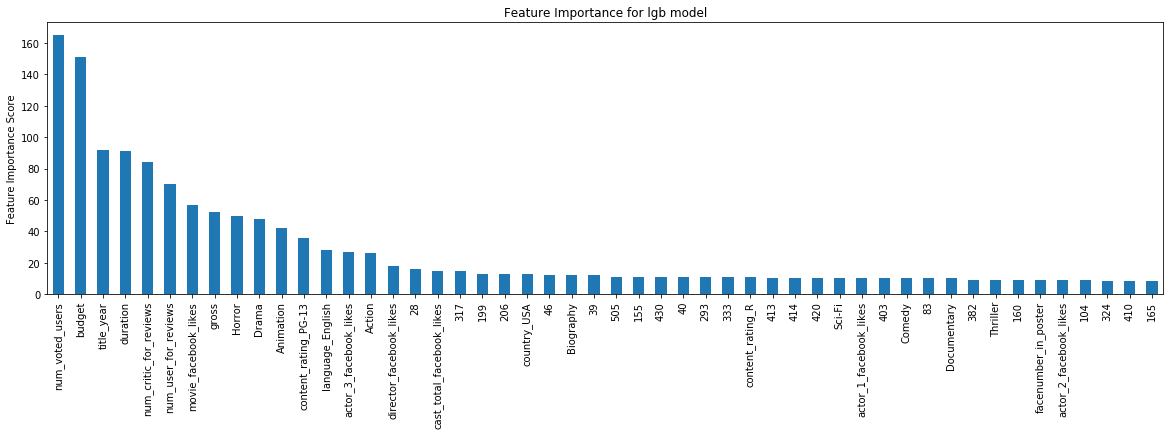

In [29]:
#Feature importance for top 50 predictors
predictors = [x for x in X_train.columns]
feat_imp = pd.Series(grid2.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance for lgb model')
plt.ylabel('Feature Importance Score')

In [30]:
feat_imp

num_voted_users              165
budget                       151
title_year                    92
duration                      91
num_critic_for_reviews        84
num_user_for_reviews          70
movie_facebook_likes          57
gross                         52
Horror                        50
Drama                         48
Animation                     42
content_rating_PG-13          36
language_English              28
actor_3_facebook_likes        27
Action                        26
director_facebook_likes       18
28                            16
cast_total_facebook_likes     15
317                           15
199                           13
206                           13
country_USA                   13
46                            12
Biography                     12
39                            12
505                           11
155                           11
430                           11
40                            11
293                           11
333       

In [23]:
preds2 = grid2.predict(X_test)
# m_lgb.save_model("modelLGB.lgb")
import sklearn.metrics as metrics
import math
print('LightGBM - test rmse: ', math.sqrt(metrics.mean_squared_error(y_test, preds2)))
#base.7757107405777778
#after parameters tune 1
#LightGBM - test rmse:  0.7364541841856148
#after parameters tune 2
#LightGBM - test rmse:  0.7354010159927831

LightGBM - test rmse:  0.7354010159927831


In [25]:
params3 = {
        'min_child_weight': [1,2, 5],
        'gamma': [0.5, 1, 2],
        'subsample': [ 0.8,0.6],
        'colsample_bytree': [0.9,0.6],
        'max_depth': [2,3,4, 5,8,9,10,11,12,15],
        'eta':[0.039,0.1, 0.5],
        'objective':['poisson'],
        'eval_metric':['rmse']
    
        }
lgb_algo = lgb.LGBMRegressor()
grid3 = RandomizedSearchCV(lgb_algo,params3,verbose=1,cv=10,n_jobs = -1,n_iter=10)
grid3.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           sile...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.9, 0.6],
     

In [27]:
grid3.best_params_

{'subsample': 0.8,
 'objective': 'poisson',
 'min_child_weight': 5,
 'max_depth': 12,
 'gamma': 0.5,
 'eval_metric': 'rmse',
 'eta': 0.1,
 'colsample_bytree': 0.9}

In [28]:
preds3= grid3.predict(X_test)
# m_lgb.save_model("modelLGB.lgb")
import sklearn.metrics as metrics
import math
print('LightGBM - test rmse: ', math.sqrt(metrics.mean_squared_error(y_test, preds3)))
#base.7757107405777778
#after parameters tune 1
#LightGBM - test rmse:  0.7364541841856148
#after parameters tune 2
#LightGBM - test rmse:  0.7354010159927831  #best lgb so far
#round3
#0.7368811501878114

LightGBM - test rmse:  0.7368811501878114


In [10]:
# #best parameters
# grid2.best_params_

params ={'subsample': 0.6,
 'objective': 'poisson',
 'min_child_weight': 2,
 'max_depth': 11,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.6}


In [11]:
%%time

gridBest = lgb.train(params, train_data, valid_sets = [fake_valid_data], verbose_eval=20) 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[20]	valid_0's poisson: -5.53073
[40]	valid_0's poisson: -5.53973
[60]	valid_0's poisson: -5.54258
[80]	valid_0's poisson: -5.54399
[100]	valid_0's poisson: -5.54452
Wall time: 1.89 s


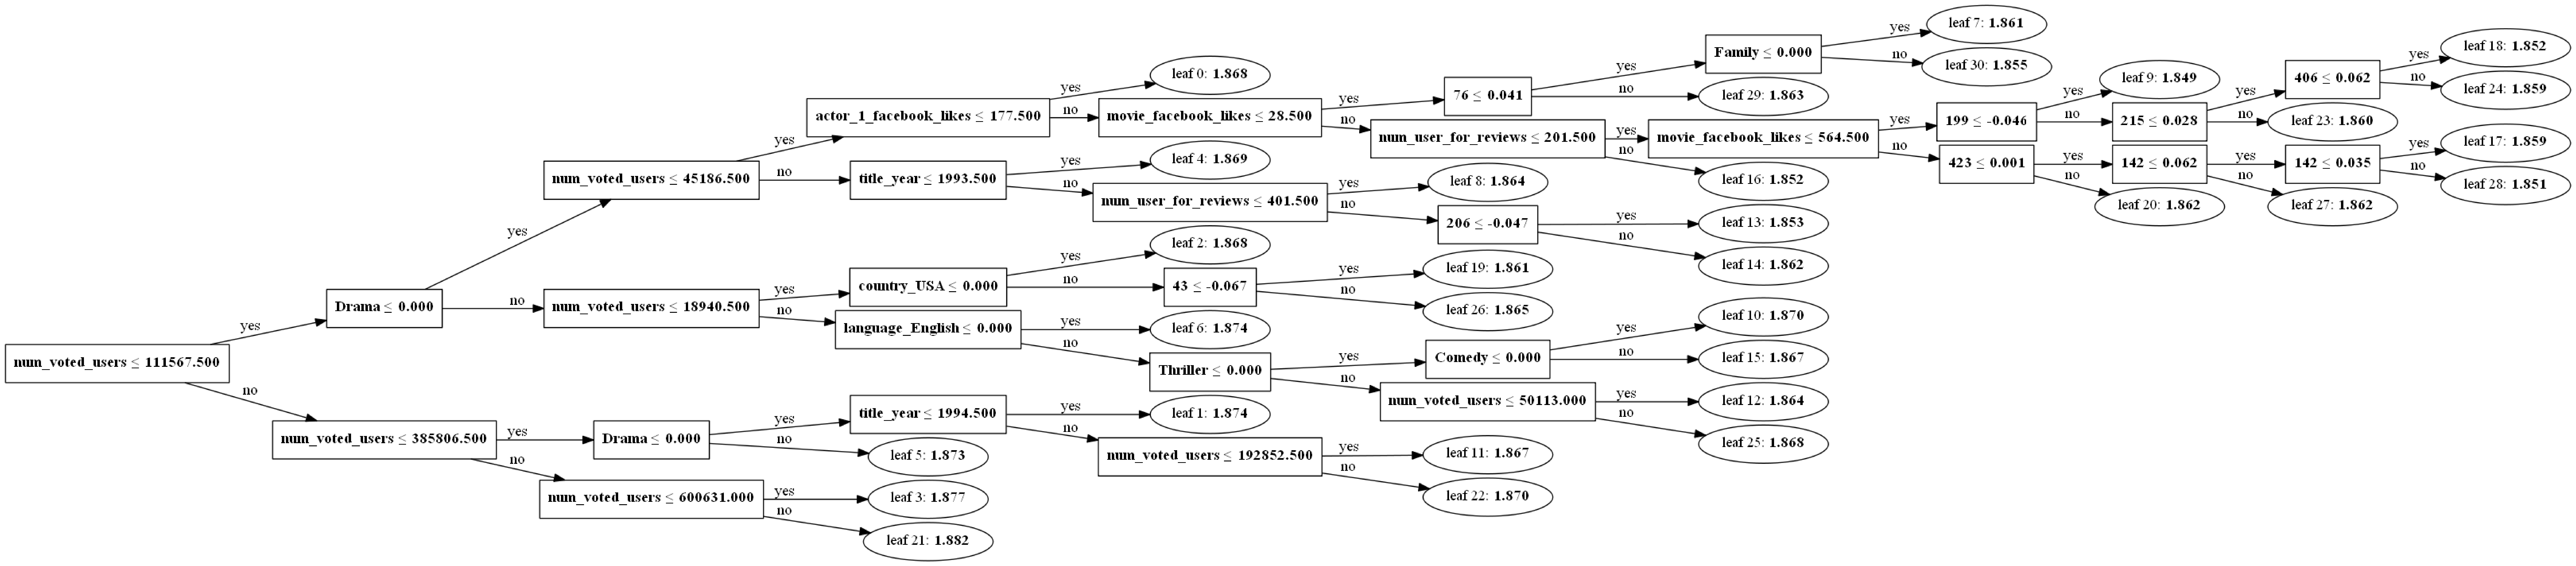

In [13]:
import matplotlib.pyplot as plt
lgb.plot_tree(gridBest)
fig = plt.gcf()
fig.set_size_inches(250, 200)
fig.savefig('bestLGBtree.png')